In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Telco-Customer-Churn.csv.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.\n\nThe columns are \n{", ".join(data.columns)}")

There are 7043 rows and 21 columns.

The columns are 
customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
data.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [10]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [11]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [12]:
data['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


# **Dataset is not balanced and the churn is a minority class.**

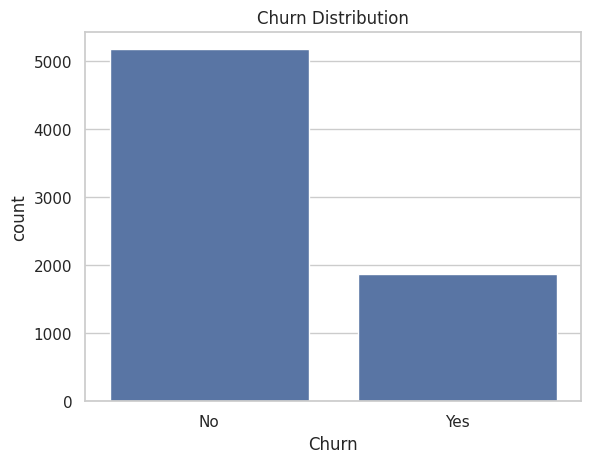

In [13]:
sns.countplot(x='Churn',data=data)
plt.title("Churn Distribution")
plt.show()

### The target variable Churn is imbalanced, with approximately 73% non-churned customers and 27% churned customers.This imbalance suggests that accuracy alone may not be a reliable evaluation metric, and metrics such as precision, recall, and F1-score should be considered during model evaluation.

# **Metric	Simple Definition	Why it matters here
**Accuracy**	The percentage of total guesses (both churn and stay) that were correct.	Misleading: In your case, a model could get 73% accuracy just by guessing "No Churn" every time.

**Precision**	Of all customers the model labeled as churners, how many actually left?	Cost Control: High precision means you aren't sending "please stay" discounts to people who were never planning to leave.

**Recall**	Of all the customers who actually left, how many did the model catch?	Retention: High recall means you are successfully identifying most of the "at-risk" customers before they go.

**F1-Score**	A single score that balances Precision and Recall.	The "Real" Grade: It prevents you from having a model that is great at one but terrible at the other.**

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

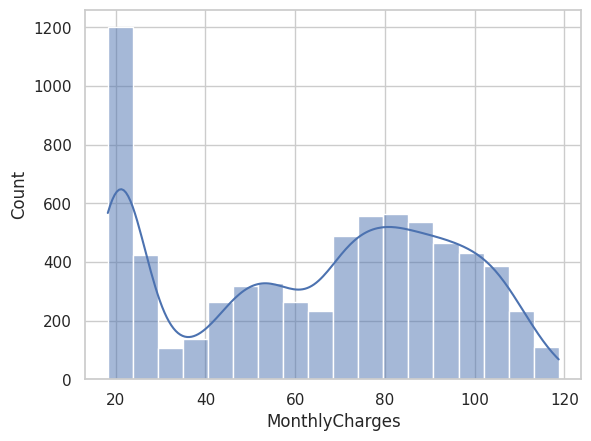

In [14]:
sns.histplot(data['MonthlyCharges'], kde=True)

<Axes: xlabel='MonthlyCharges'>

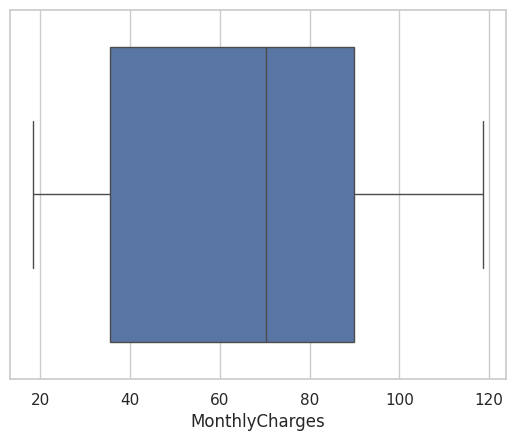

In [15]:
sns.boxplot(x=data['MonthlyCharges'])

### 1. Histogram of Monthly Charges (inline_data_1): This histogram shows the distribution of 'MonthlyCharges' across the customer base. You can observe a bimodal distribution, meaning there are two prominent peaks:

One peak is around 20-30 dollars, indicating a significant number of customers with low monthly charges. These might be customers with basic plans or specific discounts.
Another broader peak is observed from around 70-100 dollars, suggesting a large group of customers with higher monthly charges, likely those with more comprehensive service packages or premium internet plans (e.g., fiber optic).
The curve (KDE - Kernel Density Estimate) overlaid on the histogram smooths out the distribution, making these two peaks more apparent. The valleys between the peaks indicate fewer customers in those intermediate charge ranges.

2. **Boxplot of Monthly Charges (inline_data_2): This boxplot provides a summary of the central tendency, spread, and potential outliers for 'MonthlyCharges'.**

The box itself represents the interquartile range (IQR), spanning from the 25th percentile (Q1) to the 75th percentile (Q3). This means 50% of the customers have monthly charges within this range.
The line inside the box is the median (50th percentile), which appears to be around 70-75 dollars. This aligns with the rightmost peak in the histogram.
The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the quartiles. In this case, the whiskers cover almost the entire range of the data, from approximately 18 dollars to 118 dollars, indicating that there are no significant outliers detected by this specific boxplot method beyond these extremes.
Combined, these plots show that monthly charges are not uniformly distributed but are concentrated at lower and higher price points, with the median leaning towards the higher end.**

/tmp/ipython-input-813098238.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['MonthlyCharges'], shade=True, color="dodgerblue", ax=ax1)


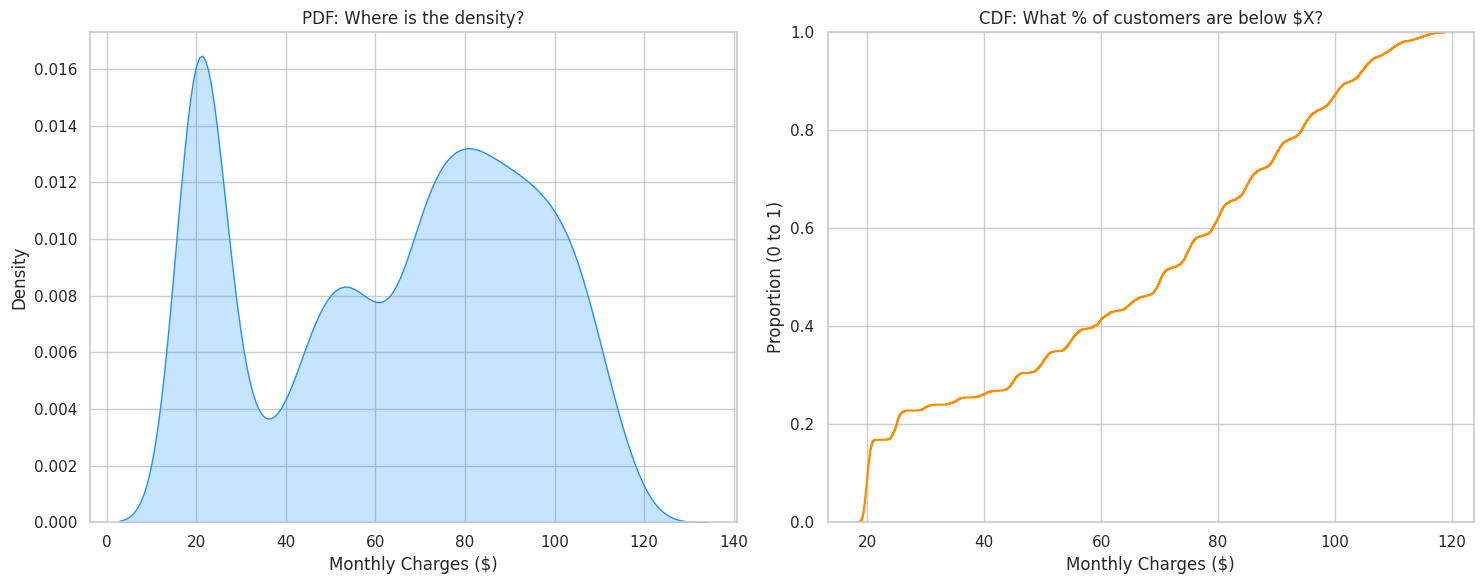

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Plot the PDF (Density)
sns.kdeplot(data['MonthlyCharges'], shade=True, color="dodgerblue", ax=ax1)
ax1.set_title('PDF: Where is the density?')
ax1.set_xlabel('Monthly Charges ($)')
ax1.set_ylabel('Density')

# 2. Plot the CDF (Cumulative)
sns.ecdfplot(data['MonthlyCharges'], color="darkorange", ax=ax2)
ax2.set_title('CDF: What % of customers are below $X?')
ax2.set_xlabel('Monthly Charges ($)')
ax2.set_ylabel('Proportion (0 to 1)')

plt.tight_layout()
plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

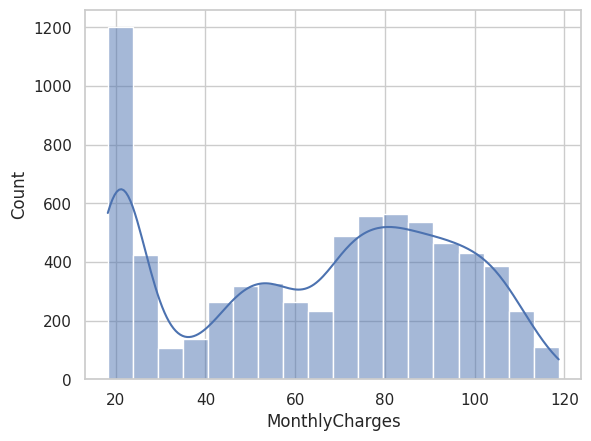

In [17]:
sns.histplot(data['MonthlyCharges'], kde=True)

<Axes: xlabel='tenure'>

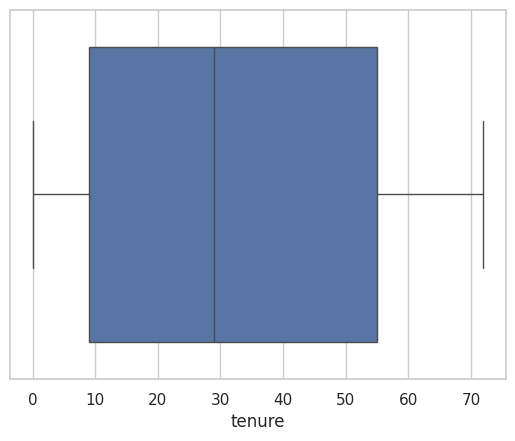

In [18]:
sns.boxplot(x=data['tenure'])

<Axes: xlabel='MonthlyCharges'>

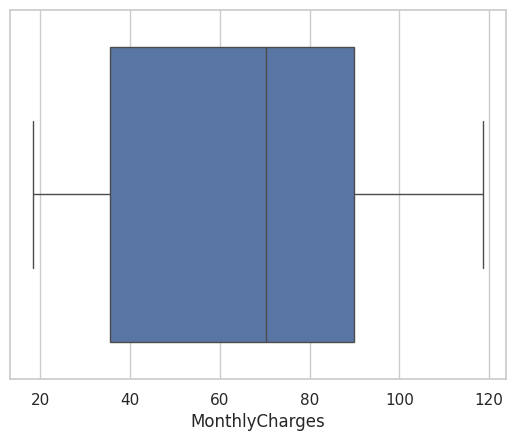

In [19]:
sns.boxplot(x=data['MonthlyCharges'])

In [24]:
data['MonthlyCharges']

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [30]:
data['TotalCharges']


,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [31]:
# This looks for rows where the string is just whitespace
blanks = data[data['TotalCharges'].str.strip() == ""]

# Show the rows that have blank TotalCharges
print(blanks[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

# To see the total count of blanks
print(f"Total blank spaces: {len(blanks)}")

      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             
3331  7644-OMVMY       0           19.85             
3826  3213-VVOLG       0           25.35             
4380  2520-SGTTA       0           20.00             
5218  2923-ARZLG       0           19.70             
6670  4075-WKNIU       0           73.35             
6754  2775-SEFEE       0           61.90             
Total blank spaces: 11


In [33]:
# 'coerce' turns empty strings or errors into NaN (null)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [35]:
data['TotalCharges'].isna().sum()

np.int64(11)

In [38]:
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [39]:
data['TotalCharges'].isna().sum()

np.int64(0)

/tmp/ipython-input-597818233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['TotalCharges'])


<Axes: ylabel='Density'>

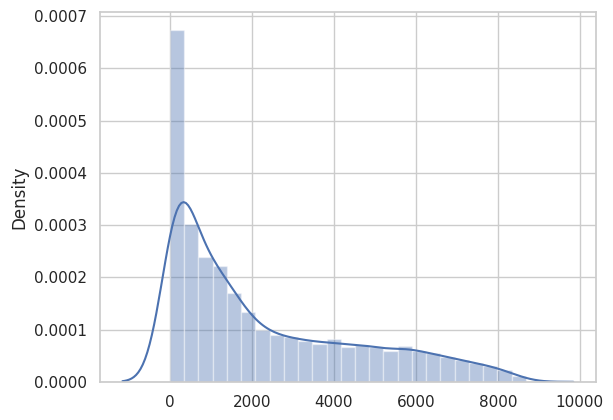

In [40]:
sns.distplot(x=data['TotalCharges'])

<Axes: xlabel='TotalCharges'>

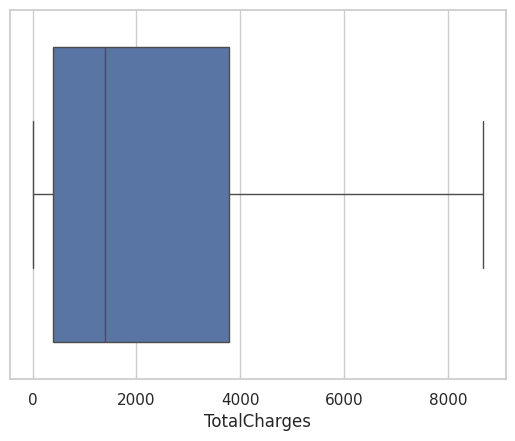

In [42]:
sns.boxplot(x = data['TotalCharges'])

In [43]:
data['TotalCharges'].skew()

np.float64(0.963234654832277)

In [44]:
data['TotalCharges'].describe()

,TotalCharges
count,7043.000000
mean,2279.734304
std,2266.794470
min,0.000000
25%,398.550000
50%,1394.550000
75%,3786.600000
max,8684.800000


<Axes: xlabel='Contract', ylabel='count'>

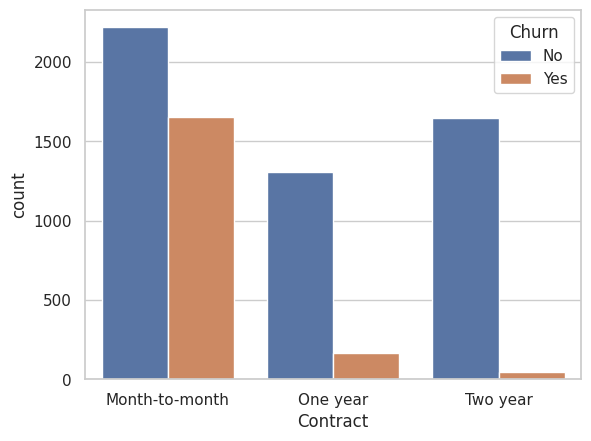

In [45]:
sns.countplot(x='Contract', hue='Churn', data=data)


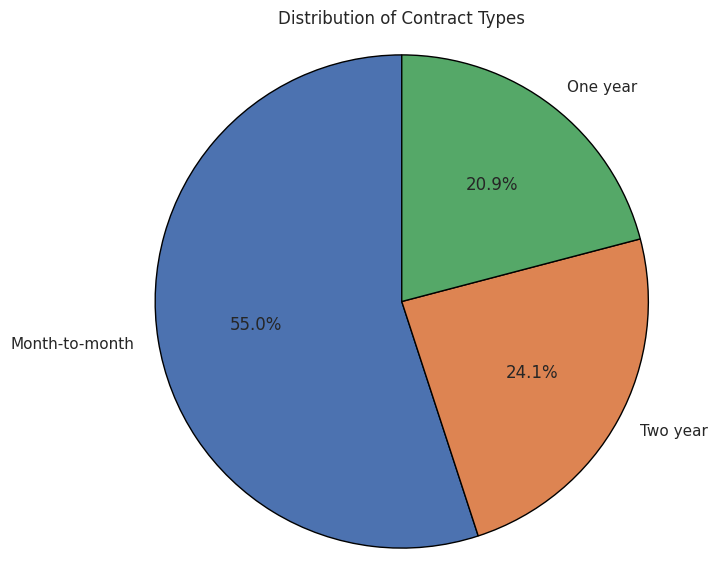

In [86]:
contract_counts = data['Contract'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Contract Types')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [75]:
data[data['Churn'] == 'Yes']['Contract'].value_counts()

,count
Contract,
Month-to-month,1655
One year,166
Two year,48


In [67]:
data[(data['Contract'] == 'Month-to-month') & (data['Churn'] == 'No')].shape

(2220, 21)

<Axes: xlabel='InternetService', ylabel='count'>

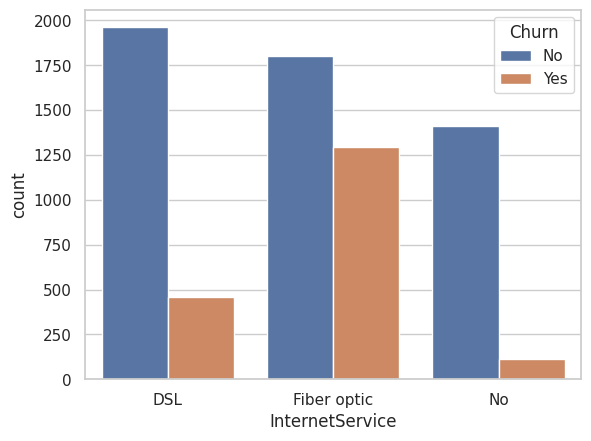

In [47]:
sns.countplot(x='InternetService', hue='Churn', data=data)

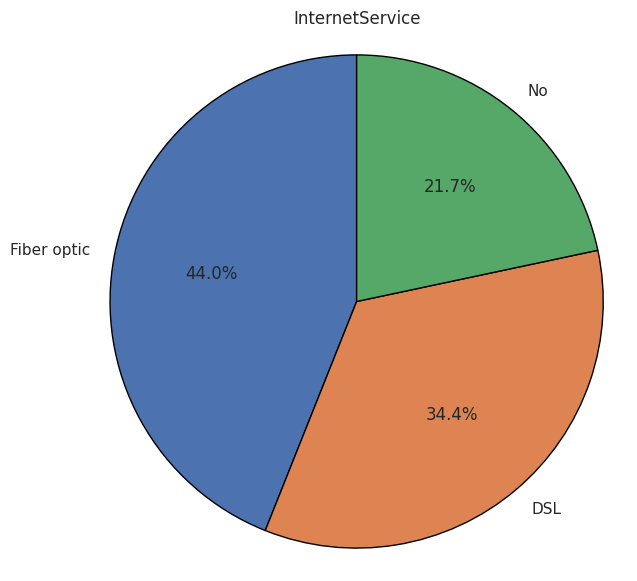

In [87]:
InternetService_counts = data['InternetService'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(InternetService_counts, labels=InternetService_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('InternetService')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [76]:
data[data['Churn'] == 'Yes']['InternetService'].value_counts()

,count
InternetService,
Fiber optic,1297
DSL,459
No,113


<Axes: xlabel='PaymentMethod', ylabel='count'>

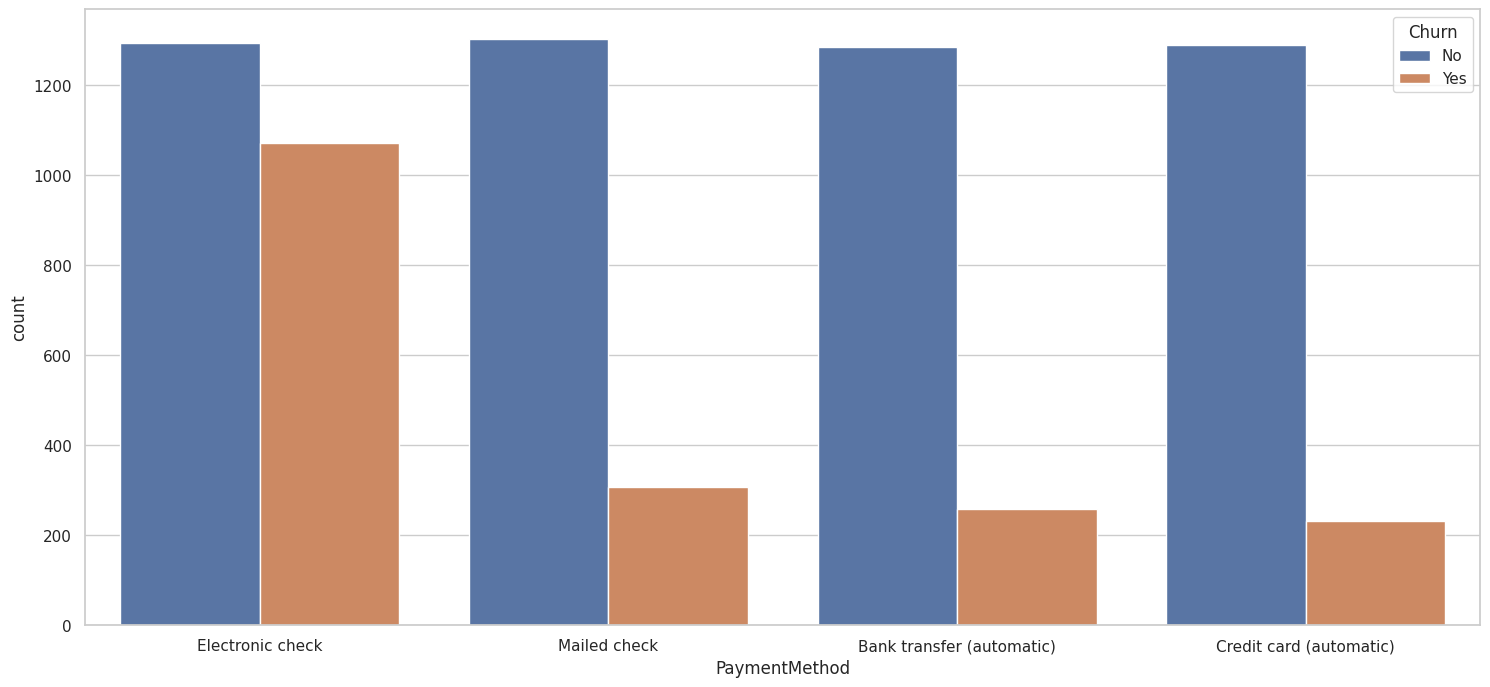

In [49]:
plt.figure(figsize=(18,8))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)

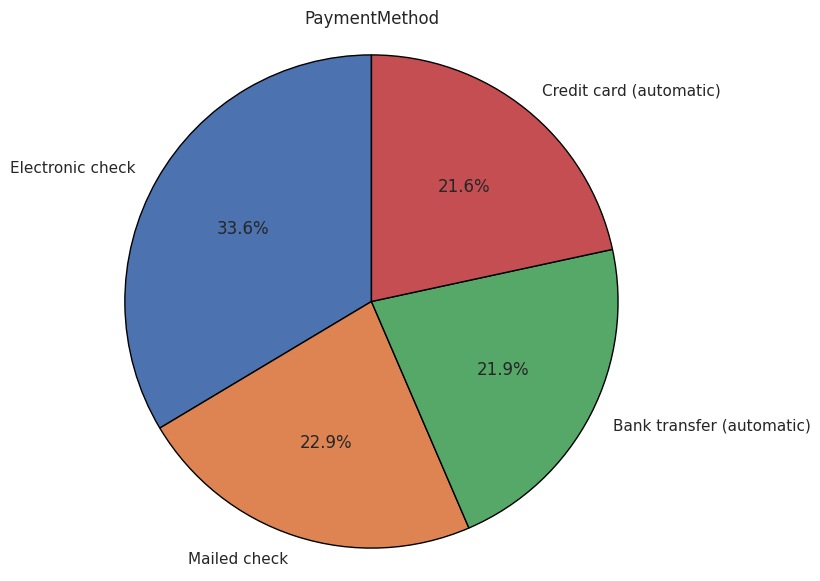

In [89]:
PaymentMethod_counts = data['PaymentMethod'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(PaymentMethod_counts, labels=PaymentMethod_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('PaymentMethod')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [50]:
data['MonthlyCharges'].describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


<Axes: xlabel='MonthlyCharges'>

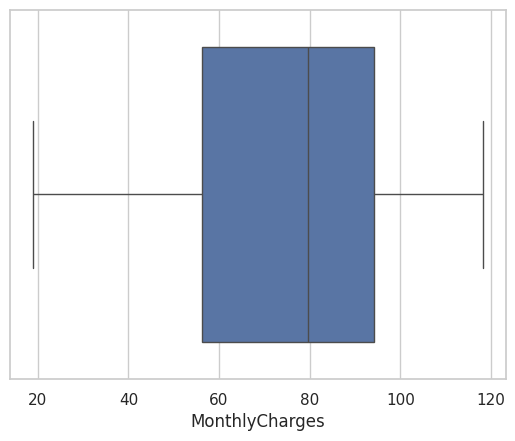

In [82]:
sns.boxplot(x=data[data['Churn'] == 'Yes']['MonthlyCharges'])

/tmp/ipython-input-3986040200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Churn'] == 'Yes']['MonthlyCharges'])


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

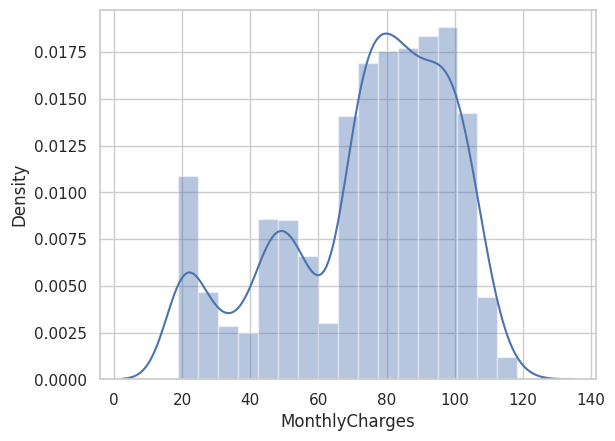

In [81]:
sns.distplot(data[data['Churn'] == 'Yes']['MonthlyCharges'])

## **month-to-month + fiberOptic + 56-98_charges =====> More churn rate**

<Axes: >

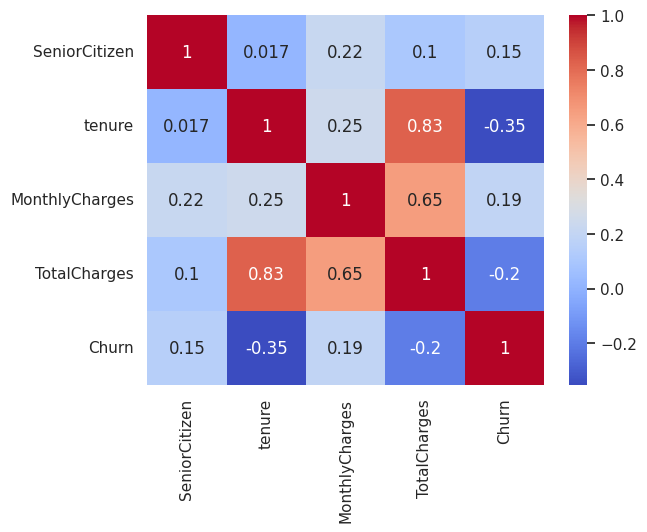

In [93]:
df_corr = data.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes':1, 'No':0})

# Select only numerical columns for correlation
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df_corr[numeric_cols].corr(), annot=True, cmap='coolwarm')


# Target Variable Analysis (Churn)

The target variable Churn is imbalanced, with significantly fewer churned customers compared to non-churned customers.

Therefore, accuracy alone is not a reliable evaluation metric for this problem.

During model evaluation, the following metrics will be prioritized:

1.Recall

2.Precision

3.F1-Score

4.ROC-AUC

Reason: In churn prediction problems, failing to identify a churned customer (false negative) is more costly than incorrectly flagging a loyal customer.

Key Insights from Exploratory Data Analysis
1. Tenure vs Churn

Customers with lower tenure are more likely to churn.

Long-term customers show a significantly lower probability of churn, indicating increased loyalty over time.

2. Contract Type vs Churn

Customers with month-to-month contracts have the highest churn rate.

One-year and two-year contracts are associated with significantly lower churn.

This suggests that longer contractual commitments improve customer retention.

3. Monthly Charges vs Churn

Customers with higher monthly charges tend to churn more frequently.

This indicates price sensitivity, particularly among newer customers.

4. Total Charges vs Churn

Customers with lower total charges exhibit higher churn rates, which correlates with shorter tenure.

Long-term customers accumulate higher total charges and are less likely to churn.

5. Internet Service vs Churn

Fiber optic customers show higher churn compared to DSL customers.

This may indicate pricing or service quality concerns.

6. Payment Method vs Churn

Customers using electronic check as a payment method have the highest churn.

Automatic payment methods such as credit cards and bank transfers show lower churn rates.